# 온라인 광고 클릭 Roc 커브로 분석하기

In [1]:
 ( 실습.  온라인 광고 클릭 ROC 커브로 분석하기 )
  1) 데이터 온라인 광고 클릭 데이터 
      -. 건수 2,000건  
          ; 훈련 데이터 2천건
          ; 테스트 데이터 2천건 
  2) 분류 모델을 적용하여 훈련, 테스트, 평가
      -. 정확도 
      -. confusion maxtrix 
  3) ROC 커브 그리기 
  4) 알고리즘 적용 
       -. Decision Tree
       -. RandomForest
       -. Logistic Regression
       -. Knn
       ....  추가 가능함.. 
   5) 제한 시간
       -. 30% 완성시 까지 ( 20명 기준 6명 ) 
       -. 혹은 4시간?? 
   6) 완료후 파일 제출 
       -. 구글 드라이브 (210115_분류모델_실습제출)
   7) 목적
       -. 머신러닝 과정 정리 
       -. 모듈 구현 경험 

SyntaxError: invalid syntax (<ipython-input-1-cd9d71183cfc>, line 1)

#### 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
train_df = pd.read_csv("train.csv",nrows = 2000)
train_df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10285851261435514187,0,14102100,1005,0,97c9ac6a,5baa6f69,f66779e6,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
1996,10285895913379867992,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,d44c074c,ae637522,...,1,2,21611,320,50,2480,3,297,100111,61
1997,10286262651832627320,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,...,1,0,21611,320,50,2480,3,297,100111,61
1998,1028628829893990987,0,14102100,1002,0,85f751fd,c4e18dd6,50e219e0,c73fb408,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32


In [112]:
unused_columns, label_column = ["id","hour","device_id","device_ip"],"click"

In [113]:
train_df = train_df.drop(unused_columns, axis = 1)
train_df

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1005,0,97c9ac6a,5baa6f69,f66779e6,ecad2386,7801e8d9,07d7df22,7db0d267,1,0,18993,320,50,2161,0,35,-1,157
1996,0,1005,0,85f751fd,c4e18dd6,50e219e0,d44c074c,ae637522,cef3e649,0bcabeaf,1,2,21611,320,50,2480,3,297,100111,61
1997,0,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,0f2161f8,9b5ce758,1,0,21611,320,50,2480,3,297,100111,61
1998,0,1002,0,85f751fd,c4e18dd6,50e219e0,c73fb408,7801e8d9,07d7df22,7e6190f3,0,0,17894,320,50,2039,2,39,100077,32


In [114]:
X_dict_train = list(train_df.drop(label_column, axis =1).T.to_dict().values())

In [115]:
X_dict_train[0]

{'C1': 1005,
 'banner_pos': 0,
 'site_id': '1fbe01fe',
 'site_domain': 'f3845767',
 'site_category': '28905ebd',
 'app_id': 'ecad2386',
 'app_domain': '7801e8d9',
 'app_category': '07d7df22',
 'device_model': '44956a24',
 'device_type': 1,
 'device_conn_type': 2,
 'C14': 15706,
 'C15': 320,
 'C16': 50,
 'C17': 1722,
 'C18': 0,
 'C19': 35,
 'C20': -1,
 'C21': 79}

In [116]:
y_train = train_df[label_column]

In [117]:
test_df = pd.read_csv("train.csv",header=0, skiprows=(1, 5000), nrows = 2000)
# skiprows(1, 5001)도 가능

In [118]:
test_df = test_df.drop(unused_columns, axis = 1)
test_df

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,1,0,15704,320,50,1722,0,35,100084,79
1,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,6332421a,1,0,15706,320,50,1722,0,35,100084,79
3,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
4,0,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,16920,320,50,1899,0,431,100077,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1005,0,85f751fd,c4e18dd6,50e219e0,d44c074c,ae637522,cef3e649,0bcabeaf,1,2,21611,320,50,2480,3,297,100111,61
1996,0,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,0f2161f8,9b5ce758,1,0,21611,320,50,2480,3,297,100111,61
1997,0,1002,0,85f751fd,c4e18dd6,50e219e0,c73fb408,7801e8d9,07d7df22,7e6190f3,0,0,17894,320,50,2039,2,39,100077,32
1998,0,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,07d7df22,d787e91b,1,0,20362,320,50,2333,0,39,-1,157


In [119]:
X_dict_test = list(test_df.drop(label_column, axis =1).T.to_dict().values())
X_dict_test[0]

{'C1': 1005,
 'banner_pos': 0,
 'site_id': '1fbe01fe',
 'site_domain': 'f3845767',
 'site_category': '28905ebd',
 'app_id': 'ecad2386',
 'app_domain': '7801e8d9',
 'app_category': '07d7df22',
 'device_model': '711ee120',
 'device_type': 1,
 'device_conn_type': 0,
 'C14': 15704,
 'C15': 320,
 'C16': 50,
 'C17': 1722,
 'C18': 0,
 'C19': 35,
 'C20': 100084,
 'C21': 79}

In [120]:
y_test = test_df[label_column]
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: click, Length: 2000, dtype: int64

#### 원 핫 인코딩 벡터 변환

In [121]:
from sklearn.feature_extraction import DictVectorizer

In [122]:
vectorizer = DictVectorizer(sparse=True)

In [123]:
X_train = vectorizer.fit_transform(X_dict_train)
X_train.shape

(2000, 992)

In [124]:
X_train.toarray()[:5]

array([[ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.]])

In [125]:
X_test = vectorizer.transform(X_dict_test) # fit_transform
X_test.shape

(2000, 992)

In [126]:
X_test.toarray()[:5]

array([[ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.],
       [ 1005., 16920.,   320., ...,     0.,     0.,     0.]])

#### 그리드 서치를 이용
#### 의사결정나무 

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
parameters = {"max_depth":[3,10,None]}

In [129]:
decision_tree = DecisionTreeClassifier(criterion="gini", min_samples_split=30)

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3,scoring="roc_auc")

In [132]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [133]:
grid_search.best_params_ #그리드 서치결과 가장 좋은 결과를 나타내는 파라미터 출력

{'max_depth': 10}

In [134]:
decision_tree_best = grid_search.best_estimator_

In [135]:
y_pred = decision_tree_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # 정확도

0.8565

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) #혼동행렬

array([[1651,   19],
       [ 268,   62]], dtype=int64)

In [138]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = decision_tree_best.predict_proba(X_test)[:,1]
y_pred_proba # 클릭할 확률만 추출

array([0.18527607, 0.18527607, 0.18527607, ..., 0.0718232 , 0.0718232 ,
       0.0718232 ])

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# rmse
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(y_test)
from sklearn.model_selection import train_test_split
 X_train, y_test = train_test_split(y_pred,y_test, Test_size=0.5)

IndentationError: unexpected indent (<ipython-input-119-e31998f948a9>, line 9)

array([0.18440287, 0.0749612 , 0.17215555, ..., 0.10136849, 0.05130795,
       0.01612163])

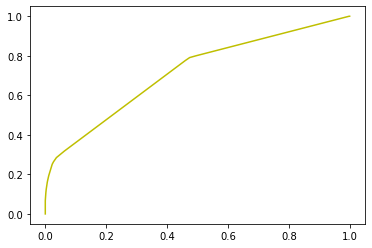

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
random_forest = RandomForestClassifier(n_estimators = 100, #트리의 갯수
                                      criterion="gini",
                                      min_samples_split = 30,
                                      n_jobs=-1)
grid_search = GridSearchCV(random_forest, 
                           parameters,
                           n_jobs=-1, 
                           cv=3,
                           scoring="roc_auc")


grid_search.fit(X_train, y_train)
random_forest_best = grid_search.best_estimator_
grid_search

plt.plot(fpr,tpr,"y-", label = "RandomForestClassifier")
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # 정확도
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) #혼동행렬
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = random_forest_best.predict_proba(X_test)[:,1]
y_pred_proba # 클릭할 확률만 추출


In [139]:
fpr, tpr,_= roc_curve(y_test, y_pred_proba) # ROC 커브계산
auc = roc_auc_score(y_test, y_pred_proba) # ROC커브의 auc계산

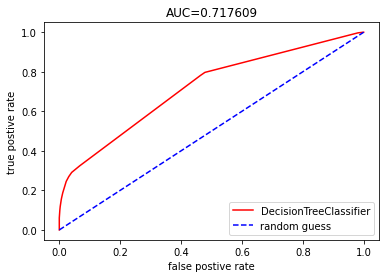

In [232]:
plt.plot(fpr,tpr, "r-", label = "DecisionTreeClassifier")
plt.plot([0,1],[0,1], "b--",label ="random guess")
plt.xlabel("false postive rate")
plt.ylabel("true postive rate")
plt.title("AUC={0:2f}".format(auc))
plt.legend(loc="lower right")

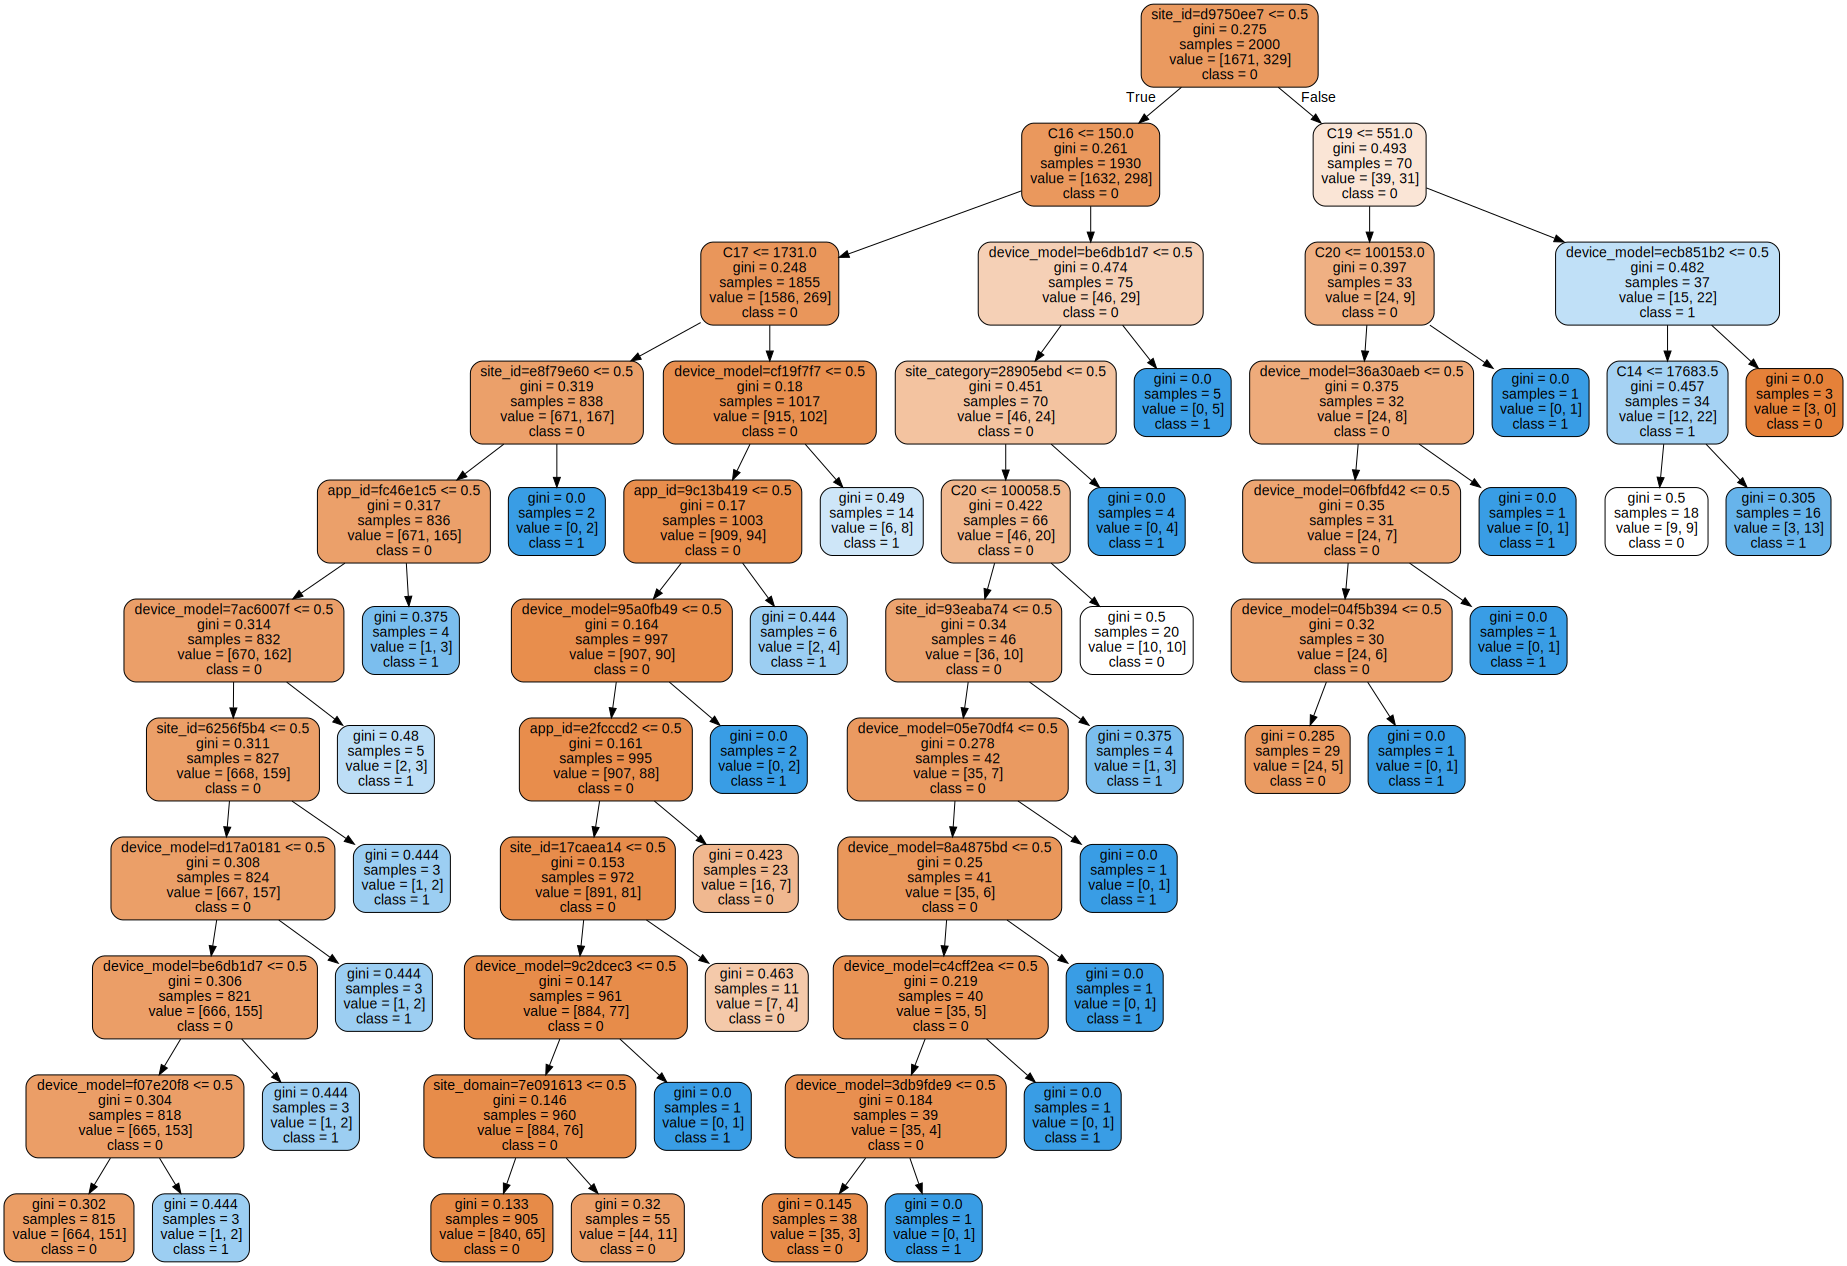

In [125]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree_best, out_file="click3.dot",
                           feature_names=vectorizer.feature_names_,
                           class_names=["0","1"], #분류
                           rounded=True, 
                           filled =True, #색상
                           impurity= True) #gini계수


import graphviz

with open("click3.dot") as f:
    dot_graph =f.read()
graphviz.Source(dot_graph)

#### 랜덤포레스트

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

random_forest = RandomForestClassifier(n_estimators = 100, #트리의 갯수
                                      criterion="gini",
                                      min_samples_split = 30,
                                      n_jobs=-1)
grid_search = GridSearchCV(random_forest, 
                           parameters,
                           n_jobs=-1, 
                           cv=3,
                           scoring="roc_auc")


grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_split=30, n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [141]:
y_pred_proba = random_forest_best.predict_proba(X_test)[:,1]
print(y_pred_proba)
fpr1,tpr1,_=roc_curve(y_test, y_pred_proba) #roc_curve는 return 값이 3개 이기 때문에 
auc1 = roc_auc_score(y_test, y_pred_proba) #fpr,tpr로 두개 받고 나머지 하나는 _로 받음

[0.17170199 0.08133533 0.14923026 ... 0.09233209 0.05349529 0.01544682]


In [142]:
grid_search.best_params_
random_forest_best = grid_search.best_estimator_
y_pred= random_forest_best.predict(X_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0 0 0 ... 0 0 0]
0.8625
[[1663    7]
 [ 268   62]]


#### 로지스틱 회귀

In [143]:
from sklearn.linear_model import LogisticRegression
vectorizer = DictVectorizer(sparse=True)
X_train = vectorizer.fit_transform(X_dict_train)
X_test = vectorizer.transform(X_dict_test)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [144]:
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.001,0.01,0.1,1,10],"penalty":["l1","l2"]}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
print(grid_search.fit(X_train, y_train))
grid_search.best_params_

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')


C:\Users\691\.conda\envs\study\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.6203432         nan 0.62038668        nan 0.62020675
        nan 0.62720879        nan 0.62032643]
  category=UserWarning


{'C': 1, 'penalty': 'l2'}

In [145]:
clf_best = grid_search.best_estimator_
y_pred = clf_best.predict(X_test)
print(y_pred)
print(np.unique(y_pred, return_counts=True))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

[0 0 0 ... 0 0 0]
(array([0, 1], dtype=int64), array([1995,    5], dtype=int64))
0.8335


In [146]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = clf_best.predict_proba(X_test)[:,1]
print(y_pred_proba)

[[1666    4]
 [ 329    1]]
[0.14624431 0.14624112 0.14624619 ... 0.14808227 0.10462121 0.19902983]


In [147]:
fpr2,tpr2,_ = roc_curve(y_test, y_pred_proba)
auc2 = roc_auc_score(y_test,y_pred_proba)

#### Knn

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [149]:
parameters = {"n_neighbors":[1,2,3,4,5]}
grid_search = GridSearchCV(knn, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
knn_best = grid_search.best_estimator_

{'n_neighbors': 3}


In [150]:
y_pred =knn_best.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
y_pred_proba = knn_best.predict_proba(X_test)[:,1]

fpr3,tpr3,_= roc_curve(y_test, y_pred_proba)
auc3 = roc_auc_score(y_test, y_pred_proba)

0.8645
[[1614   56]
 [ 215  115]]


In [151]:
fpr3,tpr3,_= roc_curve(y_test, y_pred_proba)
auc3 = roc_auc_score(y_test, y_pred_proba)

### 한번에 그리는 법 찾기

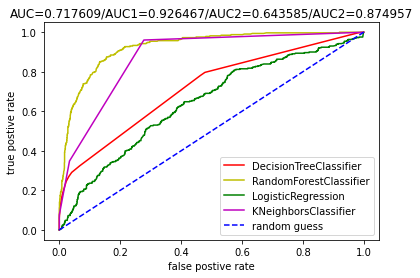

In [153]:
plt.plot(fpr,tpr, "r-", label = "DecisionTreeClassifier")
plt.plot(fpr1,tpr1, "y-", label = "RandomForestClassifier")
plt.plot(fpr2,tpr2, "g-", label = "LogisticRegression")
plt.plot(fpr3,tpr3, "m-", label = "KNeighborsClassifier")
plt.plot([0,1],[0,1],"b--",label ="random guess")
plt.xlabel("false postive rate")
plt.ylabel("true postive rate")
plt.title("AUC={0:2f}/AUC1={1:2f}/AUC2={2:2f}/AUC2={3:2f}".format(auc,auc1,auc2,auc3))
plt.legend(loc="lower right")

In [246]:
import tensorflow